In [28]:
# Initial imports
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import os
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report

In [2]:
btc = pdr.get_data_yahoo("BTC-USD")
#btc = btc[['Open','High','Low',"Close"]]
btc = btc.drop('Adj Close',axis=1)
btc

,High,Low,Open,Close,Volume
Date,,,,,
2017-02-14,1011.510010,986.471008,991.734985,1004.549988,137946000
2017-02-15,1008.840027,1001.580017,1006.210022,1007.479980,89759400
2017-02-16,1033.369995,1007.650024,1007.650024,1027.439941,122277000
2017-02-17,1053.170044,1025.640015,1026.119995,1046.209961,136474000
2017-02-18,1061.099976,1046.959961,1049.209961,1054.420044,99073504
...,...,...,...,...,...
2022-02-10,45661.171875,43402.808594,44347.800781,43565.113281,32142048537
2022-02-11,43810.832031,42114.539062,43571.128906,42407.937500,26954925781
2022-02-12,42992.550781,41852.574219,42412.300781,42244.468750,18152390304


In [3]:
# Calculate the daily returns using the closing prices and the pct_change function
btc["actual_returns"] = btc["Close"].pct_change()

# Display sample data
btc.head()

,High,Low,Open,Close,Volume,actual_returns
Date,,,,,,
2017-02-14,1011.510010,986.471008,991.734985,1004.549988,137946000,NaN
2017-02-15,1008.840027,1001.580017,1006.210022,1007.479980,89759400,0.002917
2017-02-16,1033.369995,1007.650024,1007.650024,1027.439941,122277000,0.019812
2017-02-17,1053.170044,1025.640015,1026.119995,1046.209961,136474000,0.018269
2017-02-18,1061.099976,1046.959961,1049.209961,1054.420044,99073504,0.007847


In [4]:
# Drop all NaN values from the DataFrame
btc = btc.dropna()

# Review the DataFrame
display(btc.head())
display(btc.tail())

,High,Low,Open,Close,Volume,actual_returns
Date,,,,,,
2017-02-15,1008.840027,1001.580017,1006.210022,1007.479980,89759400,0.002917
2017-02-16,1033.369995,1007.650024,1007.650024,1027.439941,122277000,0.019812
2017-02-17,1053.170044,1025.640015,1026.119995,1046.209961,136474000,0.018269
2017-02-18,1061.099976,1046.959961,1049.209961,1054.420044,99073504,0.007847
2017-02-19,1056.810059,1043.459961,1054.760010,1047.869995,77423296,-0.006212


,High,Low,Open,Close,Volume,actual_returns
Date,,,,,,
2022-02-10,45661.171875,43402.808594,44347.800781,43565.113281,32142048537,-0.017449
2022-02-11,43810.832031,42114.539062,43571.128906,42407.937500,26954925781,-0.026562
2022-02-12,42992.550781,41852.574219,42412.300781,42244.468750,18152390304,-0.003855
2022-02-13,42693.054688,41950.941406,42236.566406,42197.515625,14741589015,-0.001111
2022-02-14,42168.875000,41681.957031,42104.312500,41719.003906,15834355712,-0.011340


In [5]:
# Define a window size of 4
short_window = 4

# Create an SMA that uses short_window, and assign it to a new column named “sma_fast”
btc["sma_fast"] = btc["Close"].rolling(window=short_window).mean()

C:\Users\wesleyromero308\Anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [6]:
# Define a window size of 100
long_window = 14

# Create an SMA that uses long_window, and assign it to a new columns named “sma_slow”
btc["sma_slow"] = btc["Close"].rolling(window=long_window).mean()

C:\Users\wesleyromero308\Anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [7]:
# Drop the NaNs using dropna()
btc = btc.dropna()

In [8]:
# Assign a copy of the `sma_fast` and `sma_slow` columns to a new DataFrame called `X`
X = btc[["sma_fast", "sma_slow"]].shift().dropna().copy()

# Display sample data
display(X.head())
display(X.tail())

,sma_fast,sma_slow
Date,,
2017-03-01,1167.244965,1107.537127
2017-03-02,1186.909973,1122.895700
2017-03-03,1208.362488,1138.864990
2017-03-04,1232.117493,1155.206421
2017-03-05,1250.912506,1169.544277


,sma_fast,sma_slow
Date,,
2022-02-10,43677.490234,39997.452288
2022-02-11,43965.660156,40456.515067
2022-02-12,43607.573242,40786.772600
2022-02-13,43139.079102,41080.078962
2022-02-14,42603.758789,41385.787109


In [9]:
# Create a new column in the `trading_df` called "signal" setting its value to zero.
btc["signal"] = 0.0

In [10]:
btc

,High,Low,Open,Close,Volume,actual_returns,sma_fast,sma_slow,signal
Date,,,,,,,,,
2017-02-28,1193.250000,1171.819946,1180.719971,1179.969971,184956000,0.000000,1167.244965,1107.537127,0.0
2017-03-01,1222.500000,1179.689941,1180.040039,1222.500000,229056992,0.036043,1186.909973,1122.895700,0.0
2017-03-02,1262.130005,1215.619995,1224.680054,1251.010010,368275008,0.023321,1208.362488,1138.864990,0.0
2017-03-03,1280.310059,1250.709961,1250.709961,1274.989990,315739008,0.019168,1232.117493,1155.206421,0.0
2017-03-04,1279.400024,1230.510010,1277.430054,1255.150024,183270000,-0.015561,1250.912506,1169.544277,0.0
...,...,...,...,...,...,...,...,...,...
2022-02-10,45661.171875,43402.808594,44347.800781,43565.113281,32142048537,-0.017449,43965.660156,40456.515067,0.0
2022-02-11,43810.832031,42114.539062,43571.128906,42407.937500,26954925781,-0.026562,43607.573242,40786.772600,0.0
2022-02-12,42992.550781,41852.574219,42412.300781,42244.468750,18152390304,-0.003855,43139.079102,41080.078962,0.0


In [11]:
# Create the signal to buy
btc.loc[(btc["actual_returns"] >= 0), "signal"] = 1

# Create the signal to sell
btc.loc[(btc["actual_returns"] < 0), "signal"] = -1

In [12]:
# Copy the new "signal" column to a new Series called `y`.
y = btc["signal"].copy()

In [13]:
# Import required libraries
from pandas.tseries.offsets import DateOffset

In [14]:
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

2017-03-01 00:00:00


In [15]:
# Select the ending period for the training data with an offset of 3 months
training_end = X.index.min() + DateOffset(months=3)

# Display the training end date
print(training_end)

2017-06-01 00:00:00


In [16]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

In [17]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end:]
y_test = y.loc[training_end:]

In [18]:
# Import the required module
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X_train data
X_scaler = scaler.fit(X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [19]:
# Import the SVM model
from sklearn import svm
from sklearn.metrics import classification_report

In [20]:
# Create the classifier model
svm_model = svm.SVC()

# Fit the model to the data using X_train_scaled and y_train
svm_model = svm_model.fit(X_train_scaled, y_train)

In [21]:
# Use the trained model to predict the trading signals for the training data
training_signal_predictions = svm_model.predict(X_train_scaled)

# Display the sample predictions
training_signal_predictions[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [22]:
# Evaluate the model using a classification report
training_report = classification_report(y_train, training_signal_predictions)

# Display report
print(training_report)

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00        33
         1.0       0.65      1.00      0.78        60

    accuracy                           0.65        93
   macro avg       0.32      0.50      0.39        93
weighted avg       0.42      0.65      0.51        93



C:\Users\wesleyromero308\Anaconda3\envs\pyvizenv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wesleyromero308\Anaconda3\envs\pyvizenv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wesleyromero308\Anaconda3\envs\pyvizenv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [23]:
# Use the trained model to predict the trading signals for the testing data.
testing_signal_predictions = svm_model.predict(X_test_scaled)

In [24]:
# Evaluate the model's ability to predict the trading signal for the testing data
testing_report = classification_report(y_test, testing_signal_predictions)

# Display the report
print(testing_report)

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00       804
         1.0       0.53      1.00      0.69       916

    accuracy                           0.53      1720
   macro avg       0.27      0.50      0.35      1720
weighted avg       0.28      0.53      0.37      1720



C:\Users\wesleyromero308\Anaconda3\envs\pyvizenv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wesleyromero308\Anaconda3\envs\pyvizenv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wesleyromero308\Anaconda3\envs\pyvizenv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [25]:
# Create a predictions DataFrame
predictions_df = pd.DataFrame(index=X_test.index)

predictions_df["predicted_signal"] = testing_signal_predictions

predictions_df["actual_returns"] = btc["actual_returns"]

predictions_df["trading_algorithm_returns"] = (
    predictions_df["actual_returns"] * predictions_df["predicted_signal"]
)

# Review the DataFrame
predictions_df.head()

,predicted_signal,actual_returns,trading_algorithm_returns
Date,,,
2017-06-01,1.0,0.053127,0.053127
2017-06-02,1.0,0.033503,0.033503
2017-06-03,1.0,0.010769,0.010769
2017-06-04,1.0,-0.001407,-0.001407
2017-06-05,1.0,0.069671,0.069671


<AxesSubplot:xlabel='Date'>

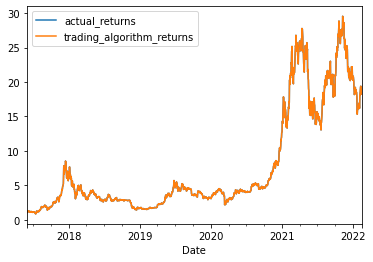

In [26]:
# Calculate and plot the cumulative returns for the `actual_returns` and the `trading_algorithm_returns`
(1 + predictions_df[["actual_returns", "trading_algorithm_returns"]]).cumprod().plot()

In [49]:
import alpaca_trade_api as tradeapi
import os
# Load .env environment variables
from dotenv import load_dotenv
load_dotenv()

True

In [52]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [54]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [55]:
# Set signal variable
signal = 1
# Create buy signal, num shares and ticker
if signal == 1:
    orderSide = "buy"
else:
    orderSide = "sell"


In [63]:
# Set the ticket symbol and the number of shares to buy
ticker = "BTC"
number_of_shares = 1

In [64]:
# Get final closing price
prices = alpaca.get_barset(ticker, "1Min").df
limit_amount = prices["BTC"]["close"]

In [65]:
limit_amount

Series([], Name: close, dtype: object)

In [62]:
prices

Empty DataFrame
Columns: [(BTC, open), (BTC, high), (BTC, low), (BTC, close), (BTC, volume)]
Index: []